In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
mcdonalds = pd.read_csv('mcdonalds.csv')

In [ ]:
# EDA

In [ ]:
mcdonalds.shape

(1453, 15)

In [ ]:
mcdonalds.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [ ]:
mcdonalds.sample(10)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
894,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+3,51,Once a month,Female
1388,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,0,44,Once a month,Male
1050,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,+2,20,Once a month,Male
1377,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+3,28,Once a month,Female
496,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,+1,42,Once a month,Male
608,No,No,No,No,No,No,No,No,Yes,No,Yes,I hate it!-5,34,Once a month,Male
1329,No,Yes,No,Yes,Yes,Yes,No,No,Yes,No,No,-4,38,Once a year,Female
716,No,No,No,Yes,No,Yes,Yes,No,No,No,Yes,0,57,Once a year,Female
23,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,I love it!+5,50,More than once a week,Female
540,No,Yes,No,Yes,Yes,Yes,No,No,Yes,No,Yes,I hate it!-5,37,Every three months,Male


In [ ]:
mcdonalds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [ ]:
mcdonalds.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [ ]:
mcdonalds.isna().sum()

,0
yummy,0
convenient,0
spicy,0
fattening,0
greasy,0
fast,0
cheap,0
tasty,0
expensive,0
healthy,0


In [ ]:
# segmentation/analysis

In [ ]:
MD_x = mcdonalds.iloc[:, 0:11].applymap(lambda x: 1 if x == 'Yes' else 0)

<ipython-input-13-a3747f947381>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  MD_x = mcdonalds.iloc[:, 0:11].applymap(lambda x: 1 if x == 'Yes' else 0)


In [ ]:
col_means = MD_x.mean().round(2)
print(col_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [ ]:
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

In [ ]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print('Explained variance:', explained_variance)
print('Cumulative variance:', cumulative_variance)

Explained variance: [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
Cumulative variance: [0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


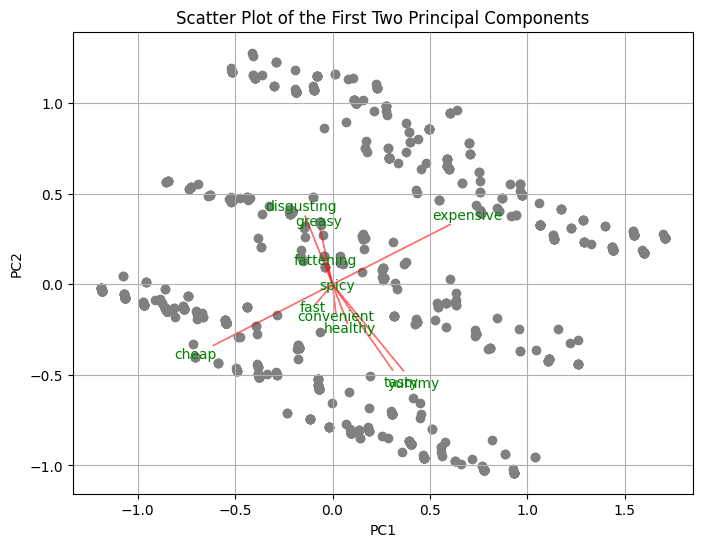

In [ ]:
# scatter plot of the first two pc's and arrows
plt.figure(figsize=(8, 6))
transformed_data = pca.transform(MD_x)
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c='grey')

for i, txt in enumerate(mcdonalds.columns[:11]):  # Assuming first 11 columns are the segmentation variables
    plt.arrow(0, 0, pca.components_[1, i], pca.components_[0, i], color='r', alpha=0.5)
    plt.text(pca.components_[1, i] * 1.15, pca.components_[0, i] * 1.15, txt, color='g', ha='center', va='center')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of the First Two Principal Components')
plt.grid(True)
plt.show()

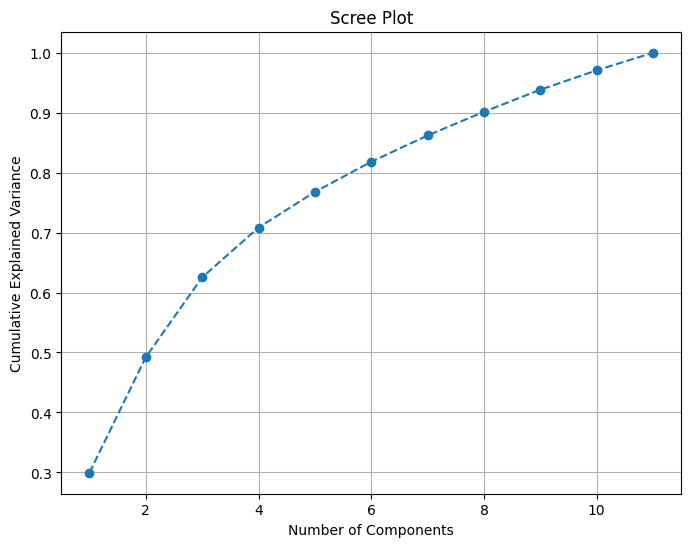

In [ ]:
# scree Plot for pca
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [ ]:
sse = {}
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=1234).fit(MD_x)
    sse[k] = kmeans.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

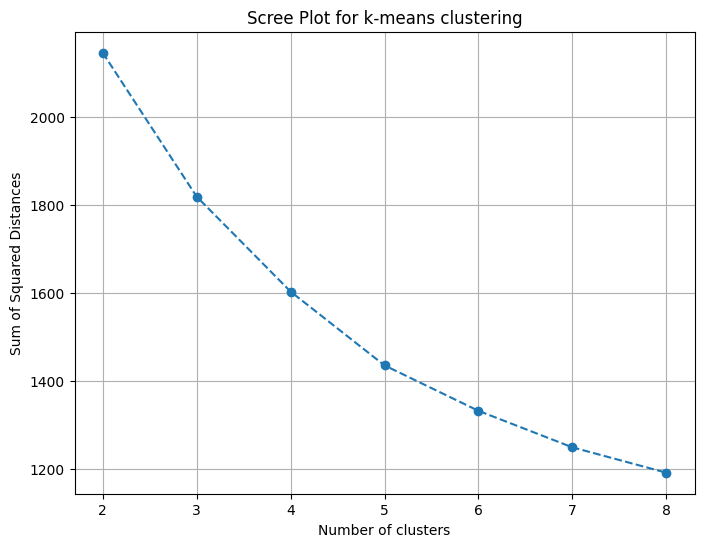

In [ ]:
# scree for k-means clustering
plt.figure(figsize=(8, 6))
plt.plot(list(sse.keys()), list(sse.values()), marker='o', linestyle='--')
plt.title('Scree Plot for k-means clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.grid(True)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=1234).fit(MD_x)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
cluster_profile = MD_x.groupby(labels).mean()
print(cluster_profile)

      yummy  convenient     spicy  fattening    greasy      fast     cheap  \
0  0.019231    0.906593  0.082418   0.931319  0.596154  0.956044  0.901099   
1  0.020833    0.679167  0.075000   0.916667  0.708333  0.741667  0.066667   
2  0.966229    0.981238  0.084428   0.778612  0.348968  0.958724  0.923077   
3  0.873418    0.958861  0.136076   0.905063  0.607595  0.857595  0.107595   

      tasty  expensive   healthy  disgusting  
0  0.285714   0.013736  0.074176    0.329670  
1  0.079167   0.895833  0.062500    0.725000  
2  0.973734   0.018762  0.339587    0.046904  
3  0.930380   0.917722  0.208861    0.107595  


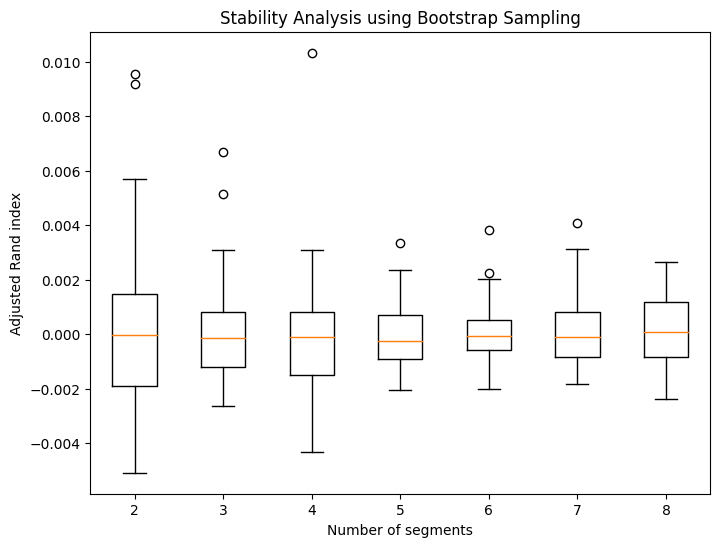

In [ ]:
# Help from ChatGPT, Because I couldn't figure this out.

from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans
import numpy as np

# Function to perform bootstrap stability analysis
def bootstrap_stability(X, max_clusters=8, nboot=100, nrep=10):
    stability = [[] for _ in range(2, max_clusters + 1)]  # Create a list of lists
    for k in range(2, max_clusters + 1):
        rand_indices = []
        for _ in range(nboot):
            X_boot = resample(X)  # Bootstrap sample
            kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
            kmeans.fit(X_boot)

            # For stability, we should compare the labels of the bootstrapped data to the original data labels
            rand_indices.append(adjusted_rand_score(kmeans.labels_, KMeans(n_clusters=k, n_init=nrep, random_state=1234).fit(X).labels_))
        stability[k-2] = rand_indices
    return stability


stability = bootstrap_stability(MD_x, max_clusters=8)

plt.figure(figsize=(8, 6))
plt.boxplot(stability, labels=range(2, 9))
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand index')
plt.title('Stability Analysis using Bootstrap Sampling')
plt.show()

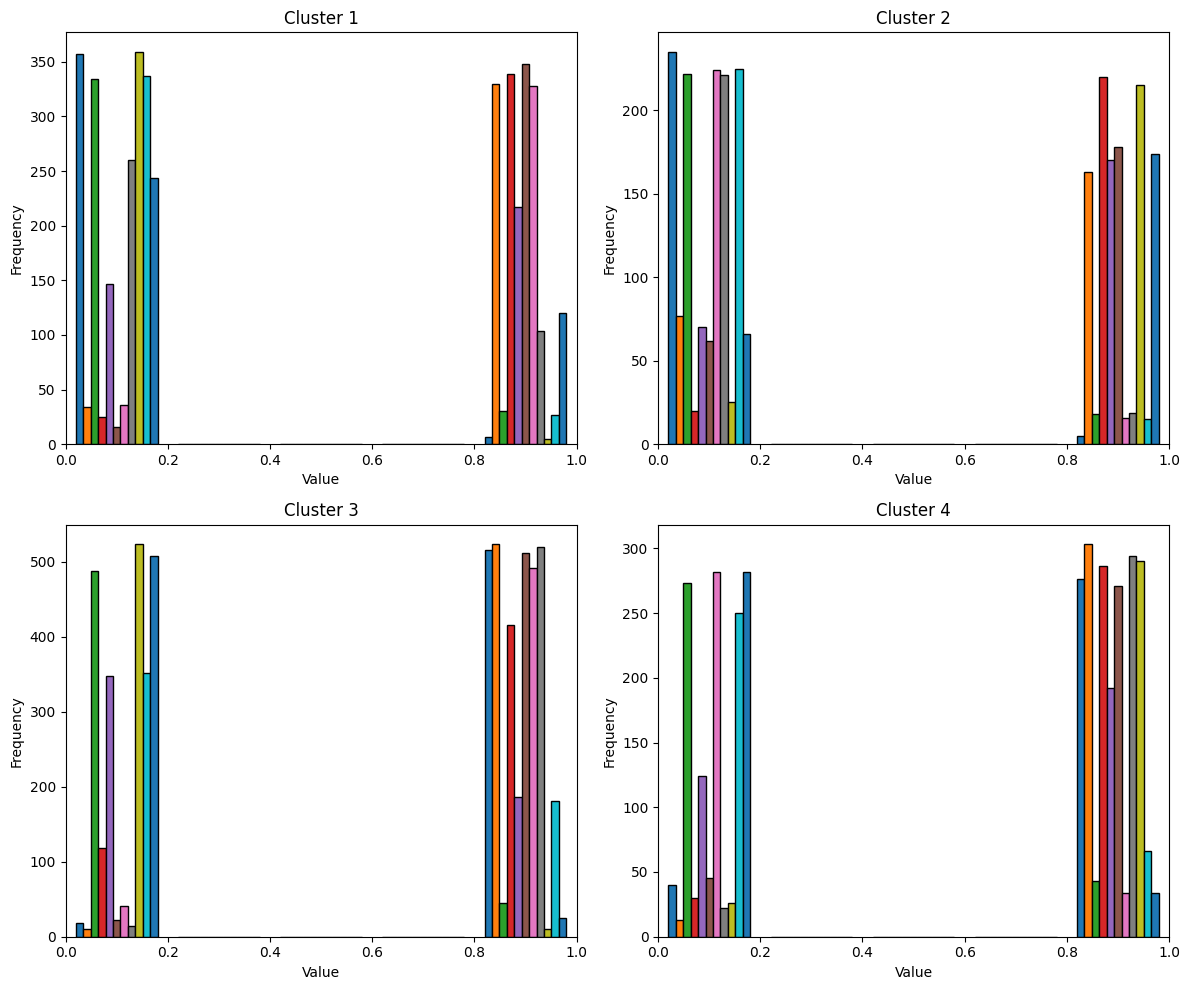

In [ ]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=1234)
kmeans.fit(MD_x)
labels = kmeans.labels_

# histograms
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

for i in range(optimal_clusters):
    cluster_points = MD_x[labels == i]

    axs[i].hist(cluster_points, bins=5, range=(0, 1), edgecolor='black')
    axs[i].set_title(f'Cluster {i+1}')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
    axs[i].set_xlim(0, 1)

plt.tight_layout()
plt.show()

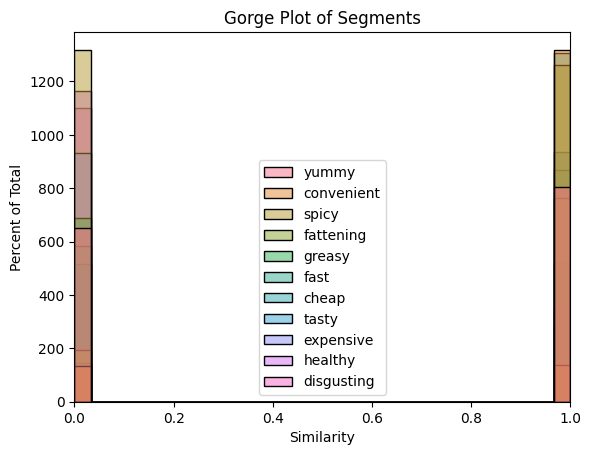

In [ ]:
# gorge plot
sns.histplot(data=MD_x, bins=30, kde=False)
plt.xlim(0, 1)
plt.xlabel('Similarity')
plt.ylabel('Percent of Total')
plt.title('Gorge Plot of Segments')
plt.show()

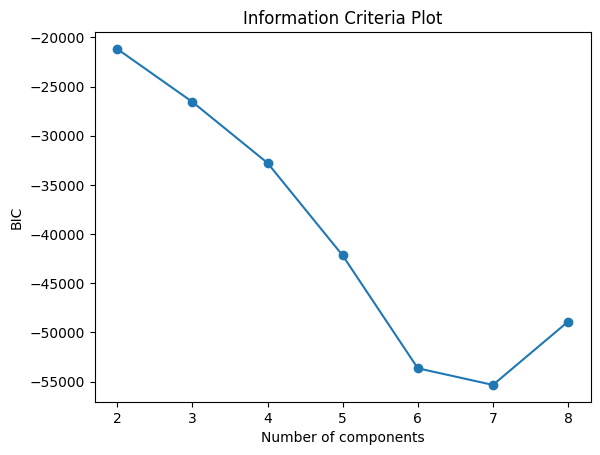

In [ ]:
from sklearn.mixture import GaussianMixture

# information criteria
gmm_results = []
for k in range(2, 9):
    gmm = GaussianMixture(n_components=k, n_init=10, random_state=1234)
    gmm.fit(MD_x)
    gmm_results.append(gmm.bic(MD_x))

plt.plot(range(2, 9), gmm_results, marker='o')
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.title('Information Criteria Plot')
plt.show()

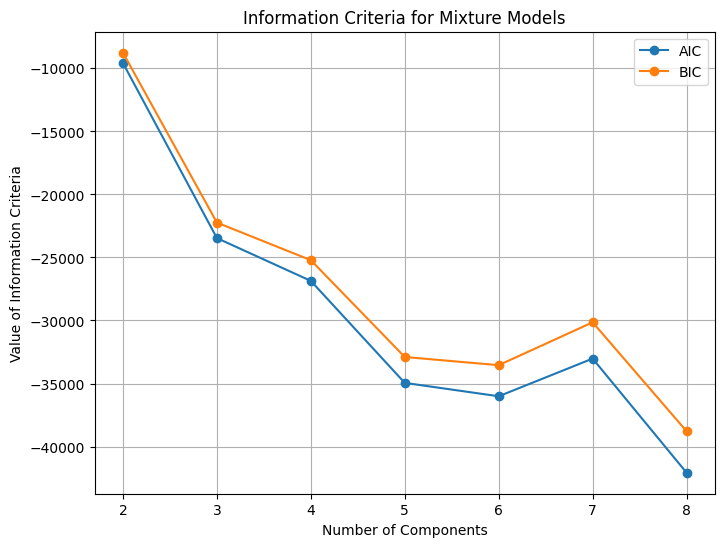

In [ ]:
# criteria for aic and bic

aic_values = []
bic_values = []

for k in range(2, 9):
    gm = GaussianMixture(n_components=k, random_state=1234)
    gm.fit(MD_x)
    aic_values.append(gm.aic(MD_x))
    bic_values.append(gm.bic(MD_x))

plt.figure(figsize=(8, 6))
plt.plot(range(2, 9), aic_values, label='AIC', marker='o')
plt.plot(range(2, 9), bic_values, label='BIC', marker='o')
plt.title('Information Criteria for Mixture Models')
plt.xlabel('Number of Components')
plt.ylabel('Value of Information Criteria')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
gmm_4 = GaussianMixture(n_components=4, n_init=10, random_state=1234).fit(MD_x)
gmm_labels = gmm_4.predict(MD_x)

# cross-tabulation table
cross_tab = pd.crosstab(labels, gmm_labels, rownames=['KMeans'], colnames=['GMM'])
cross_tab

GMM,0,1,2,3
KMeans,,,,
0,31,51,268,14
1,4,214,0,22
2,143,0,362,28
3,0,3,0,313


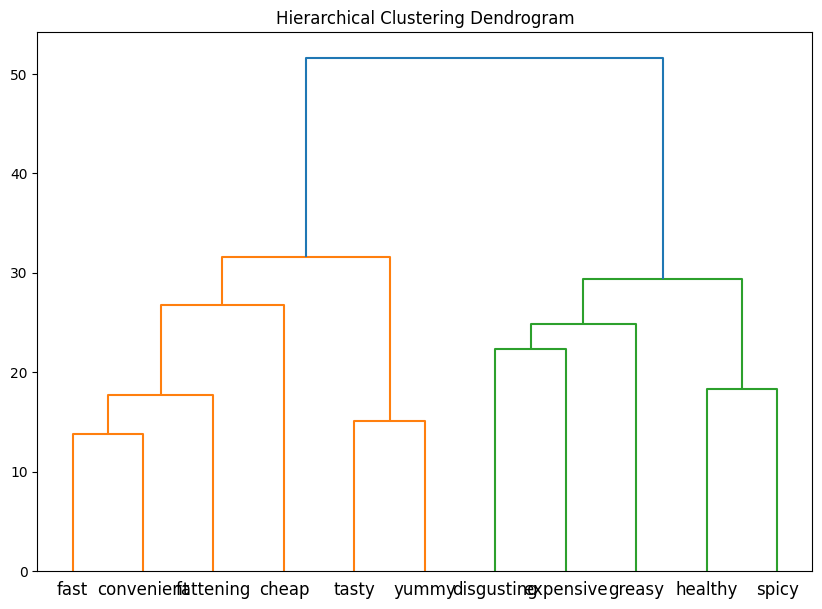

In [ ]:
linked = linkage(MD_x.T, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=MD_x.columns, orientation='top', distance_sort='descending')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

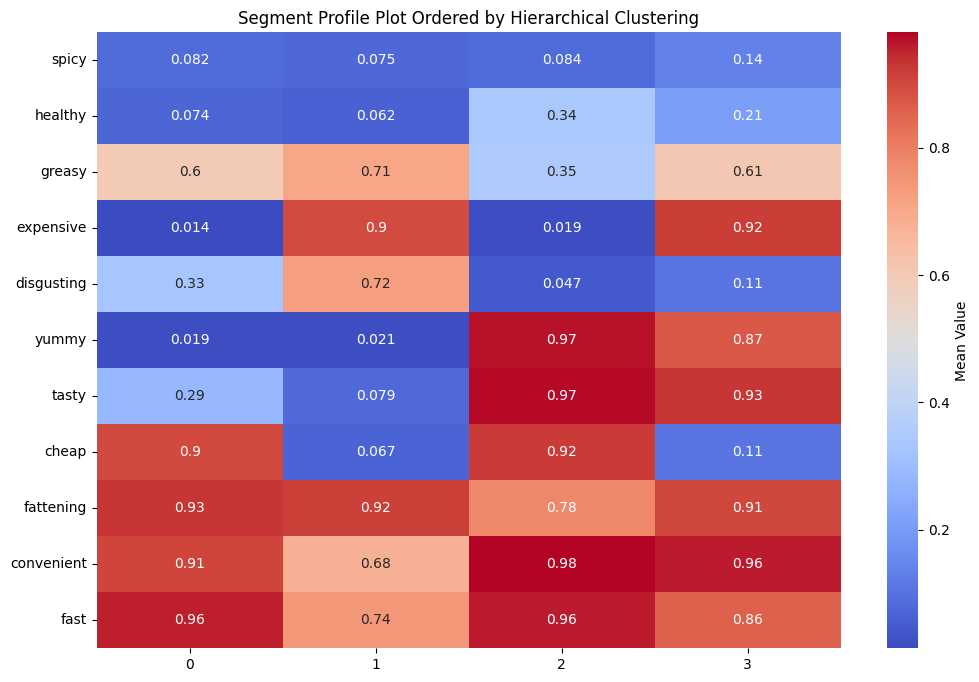

In [ ]:
# ordering of the variables based on hierarchical clustering
dendro = dendrogram(linked, no_plot=True)
ordered_columns = [mcdonalds.columns[:11][i] for i in dendro['leaves']]
cluster_profile_ordered = pd.DataFrame(MD_x, columns=mcdonalds.columns[:11]).groupby(labels).mean()

# columns according to the hierarchical clustering
cluster_profile_ordered = cluster_profile_ordered[ordered_columns]

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_profile_ordered.T, annot=True, cmap="coolwarm", cbar_kws={'label': 'Mean Value'})
plt.title('Segment Profile Plot Ordered by Hierarchical Clustering')
plt.show()

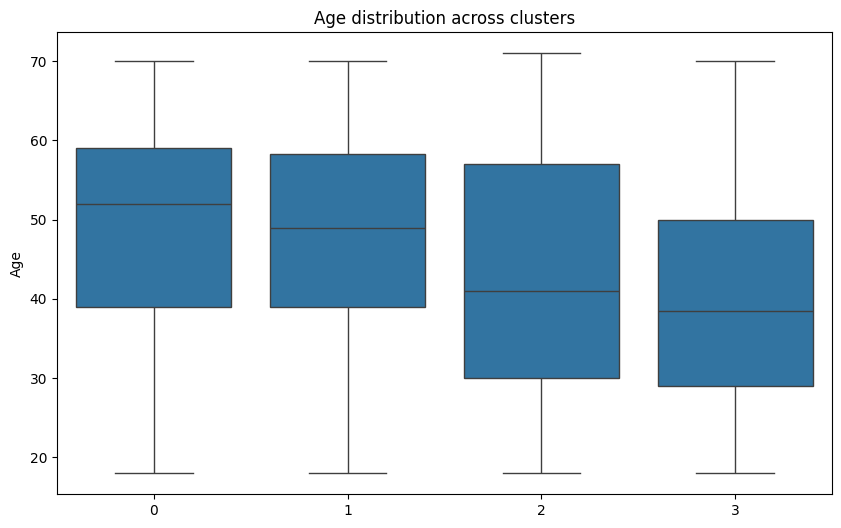

In [ ]:
# boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=labels, y=mcdonalds['Age'])
plt.title('Age distribution across clusters')
plt.show()

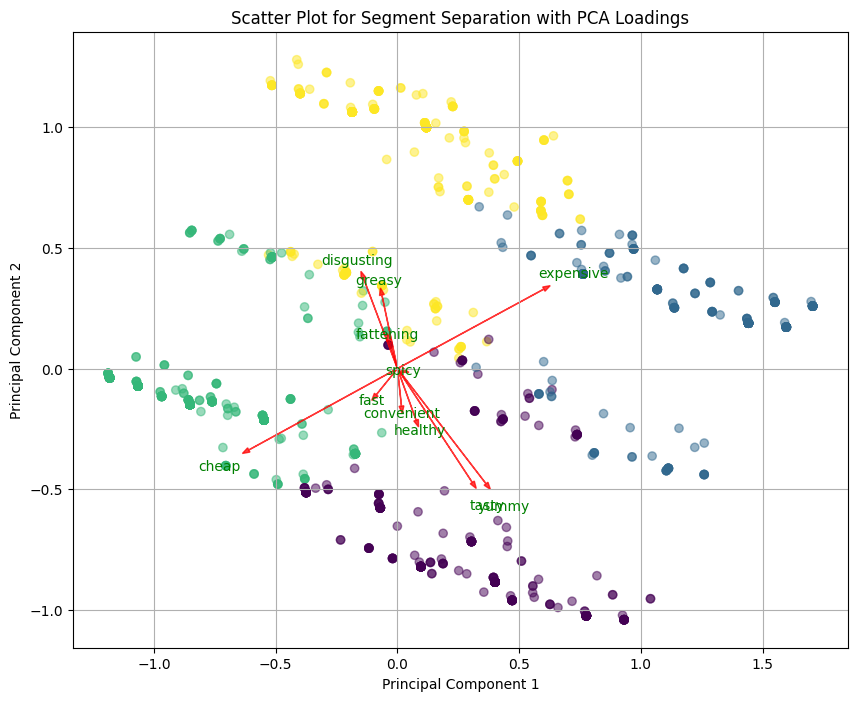

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=labels, cmap='viridis', alpha=0.5)

for i, txt in enumerate(mcdonalds.columns[:11]):
    plt.arrow(0, 0, pca.components_[1, i], pca.components_[0, i], color='red', alpha=0.75, head_width=0.02, head_length=0.03)
    plt.text(pca.components_[1, i] * 1.2, pca.components_[0, i] * 1.2, txt, color='green', ha='center', va='center')

plt.title('Scatter Plot for Segment Separation with PCA Loadings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [ ]:
# mixture model fitting is not converted due to complexity
# running a decision tree classifier
tree = DecisionTreeClassifier(random_state=1234)
tree.fit(MD_x, labels)

DecisionTreeClassifier(random_state=1234)

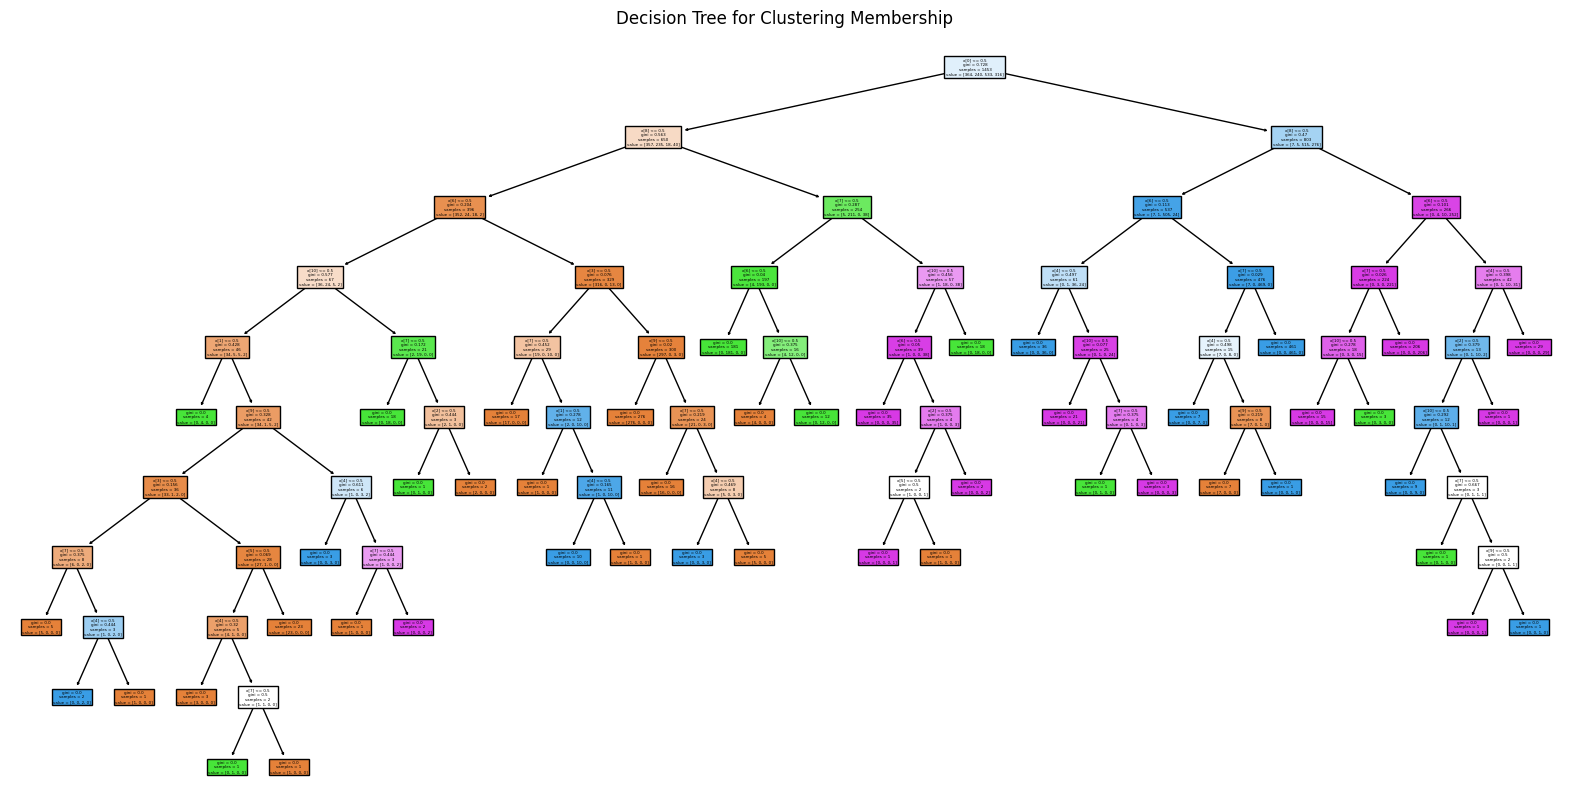

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True)
plt.title('Decision Tree for Clustering Membership')
plt.show()

In [ ]:
# creating a binary target variable
target = (labels == 2).astype(int)

# Age, Like, VisitFrequency as features
features = pd.get_dummies(mcdonalds[['Like', 'Age', 'VisitFrequency']], drop_first=True)
tree.fit(features, target)

DecisionTreeClassifier(random_state=1234)

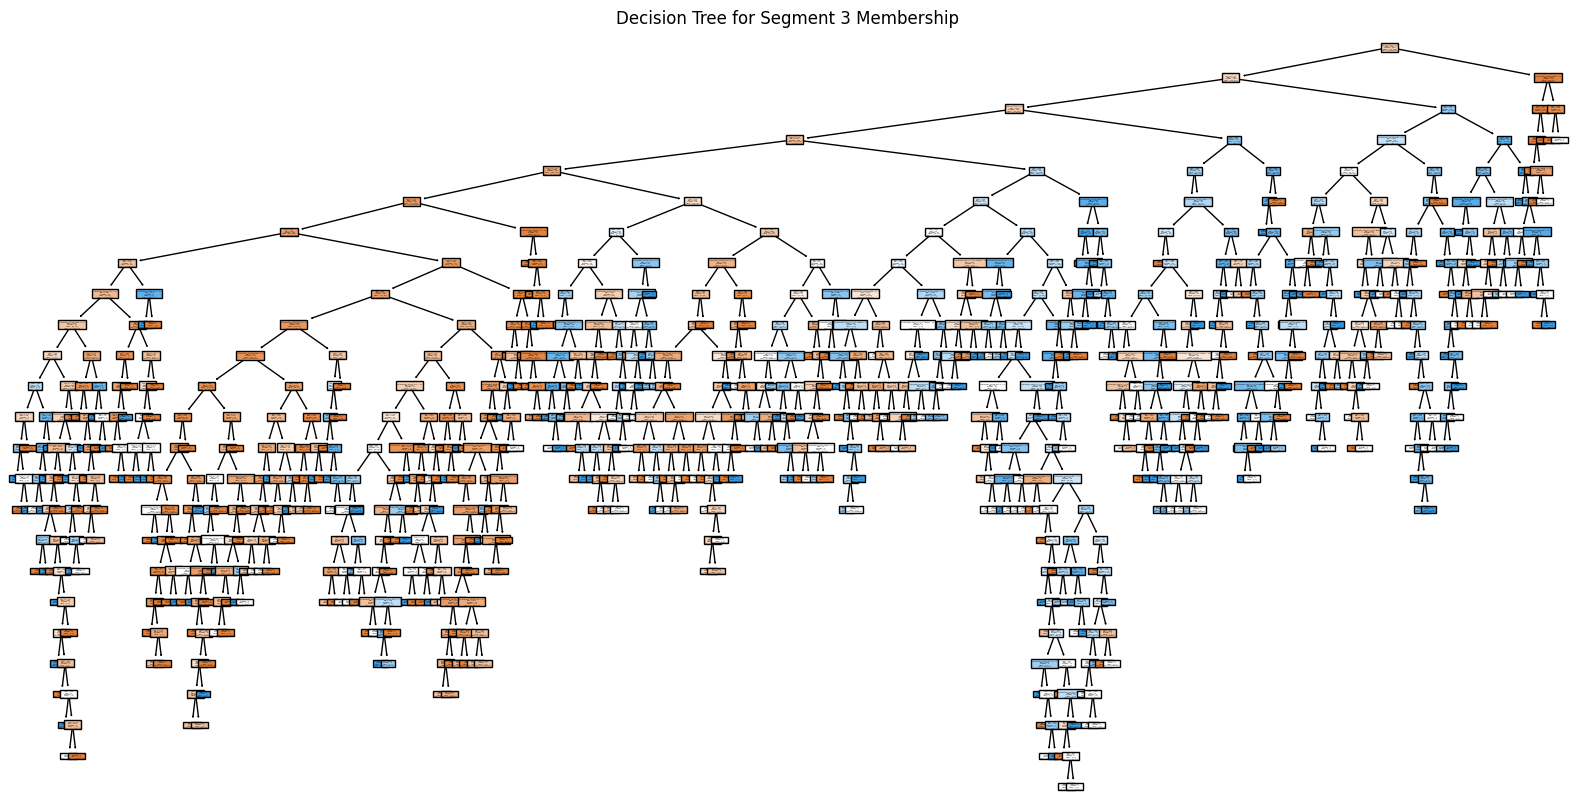

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=features.columns, class_names=['Not Segment 3', 'Segment 3'])
plt.title('Decision Tree for Segment 3 Membership')
plt.show()

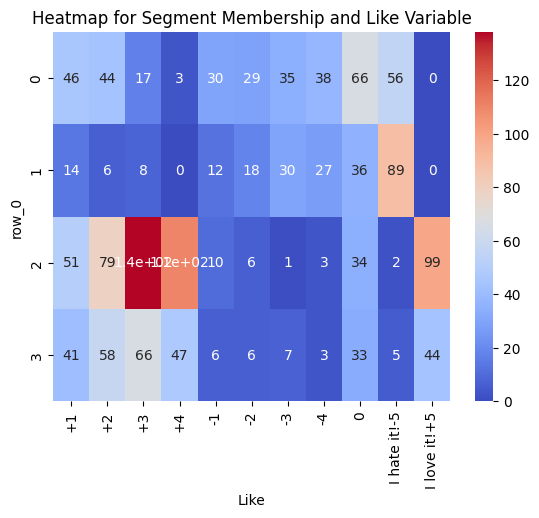

In [ ]:
# mosaic plot for segment membership and like variable...
# due to complexity, the mosaic plot is replaced with a heatmap.
cross_tab = pd.crosstab(labels, mcdonalds['Like'])
sns.heatmap(cross_tab, annot=True, cmap='coolwarm')
plt.title('Heatmap for Segment Membership and Like Variable')
plt.show()

In [ ]:
tree = DecisionTreeClassifier(random_state=1234)
tree.fit(features, labels)

DecisionTreeClassifier(random_state=1234)

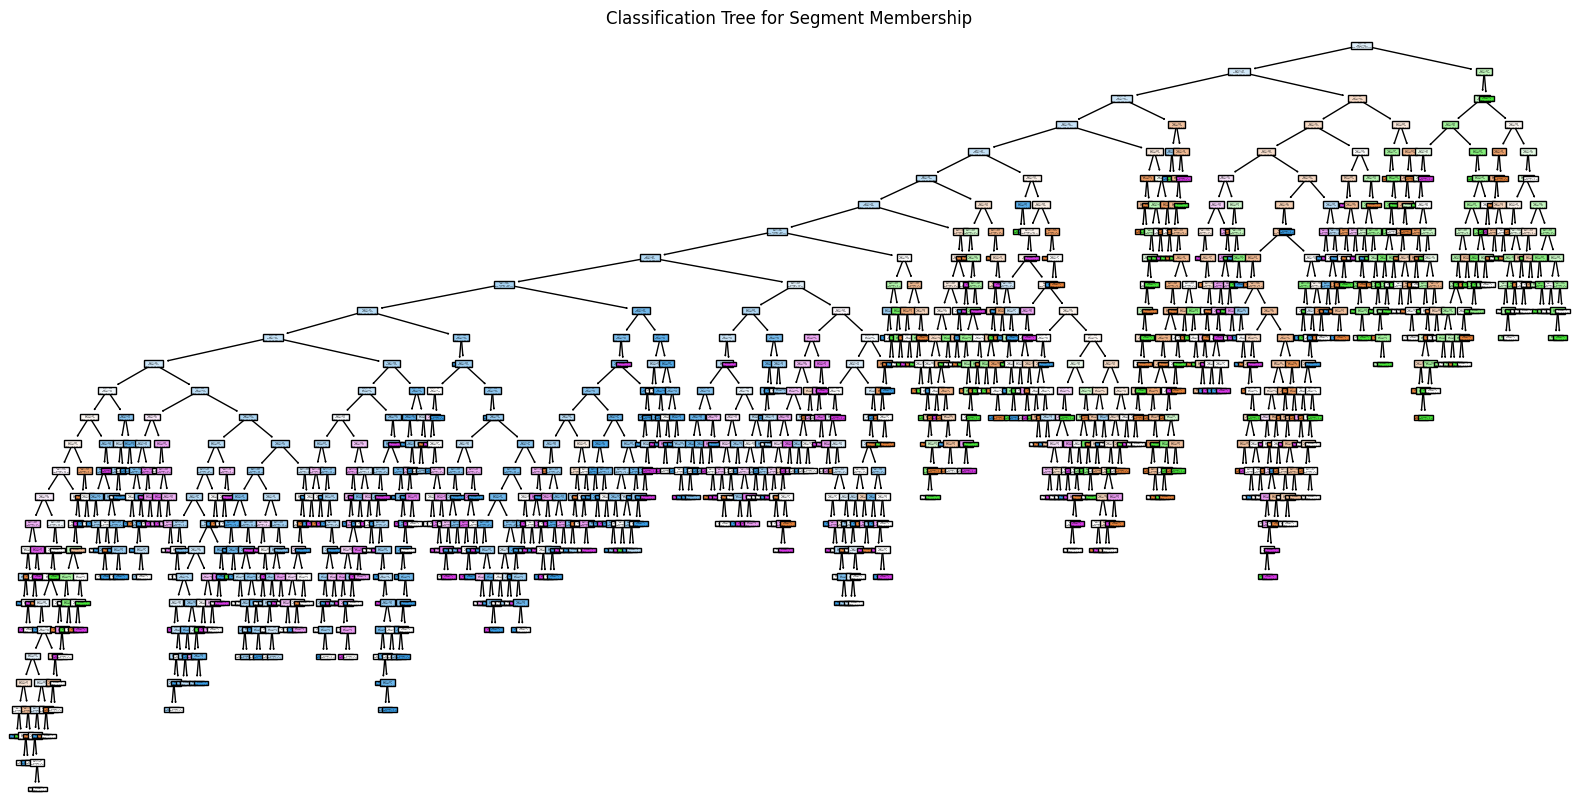

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True)
plt.title('Classification Tree for Segment Membership')
plt.show()

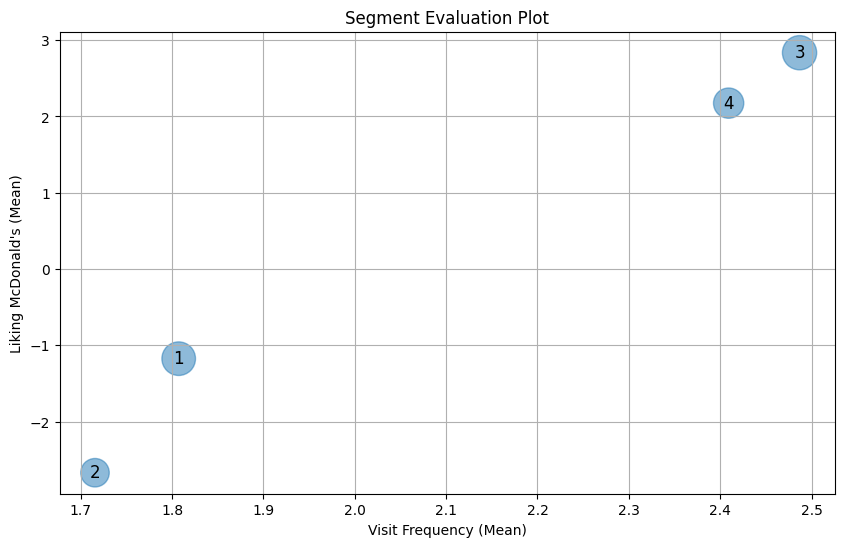

In [ ]:
# we need to convert 2 columns to numeric for mean calculation.
visit_mapping = {
    'Every three months': 1,
    'Once a month': 2,
    'Every two weeks': 3,
    'Once a week': 4,
    'More than once a week': 5
}

like_mapping = {
    'I hate it!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '+1': 1,
    '+2': 2,
    '+3': 3,
    '+4': 4,
    'I love it!+5': 5
}

mcdonalds['VisitFrequencyNum'] = mcdonalds['VisitFrequency'].map(visit_mapping)
mcdonalds['LikeNum'] = mcdonalds['Like'].map(like_mapping)

visit = mcdonalds.groupby(labels)['VisitFrequencyNum'].mean()
like = mcdonalds.groupby(labels)['LikeNum'].mean()
female = mcdonalds.groupby(labels)['Gender'].apply(lambda x: (x == 'Female').mean())

plt.figure(figsize=(10, 6))
plt.scatter(visit, like, s=female*1000, alpha=0.5)
for i in range(len(visit)):
    plt.text(visit.iloc[i], like.iloc[i], str(i+1), fontsize=12, ha='center', va='center')
plt.title('Segment Evaluation Plot')
plt.xlabel('Visit Frequency (Mean)')
plt.ylabel('Liking McDonald\'s (Mean)')
plt.grid(True)
plt.show()

       Male
0  0.414835
1  0.579167
2  0.392120
3  0.525316


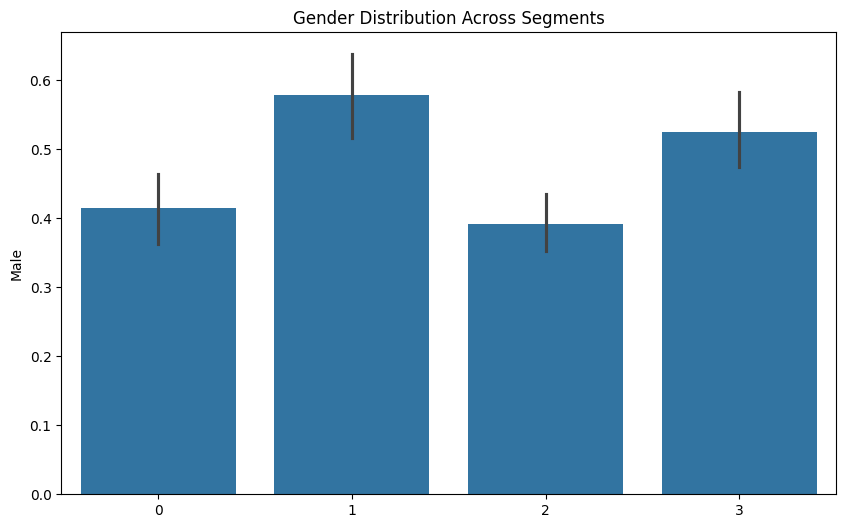

In [ ]:
# 'gender' to numeric and calculate mean segment values for gender
female = pd.get_dummies(mcdonalds['Gender'], drop_first=True)
gender_means = female.groupby(labels).mean()
print(gender_means)

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=female.squeeze())
plt.title('Gender Distribution Across Segments')
plt.show()